## Open CV


*   Open Source Computer Vision Library.
*   Is a powerful open source software widely used in image processing, deep learning, and computer vision application.



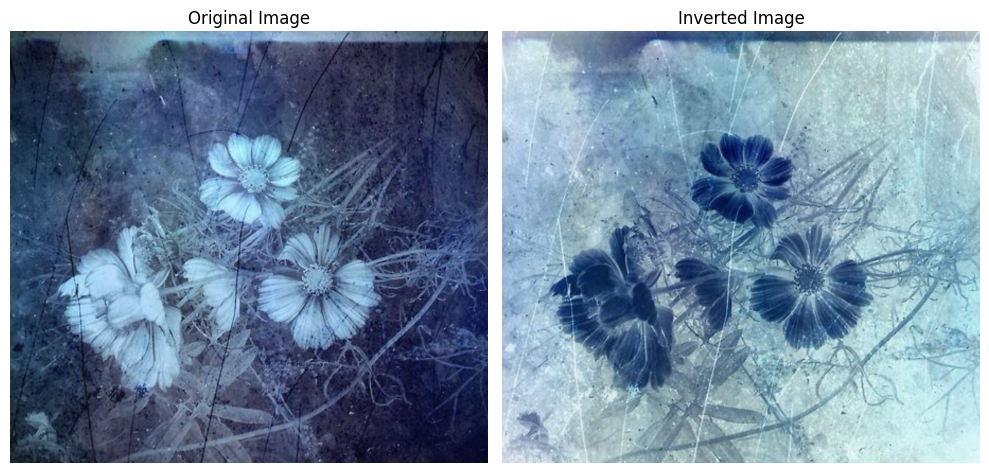

In [ ]:
# The cv2 provides function for image processing, include point-processing techniques
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("original_image.png")

#Convert image to matplotlib display
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Invert image
img_neg = 255 - img_bgr

# Plot the images
plt.figure(figsize=(10,5))

# ORIGINAL IMAGE
plt.subplot(121) #Single plot(1 row, 2 columns, 1 first plot)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off") #It hides the x & y axis

# INVERTED
plt.subplot(122)
plt.imshow(img_neg)
plt.title("Inverted Image")
plt.axis("off")

plt.tight_layout()
plt.show()

##GRAY LEVEL SLICING


*   Focuses on enhancing a specific range of grey level in an image.
*   THe intervals are predefined and pixels falling in that range are manipulated.



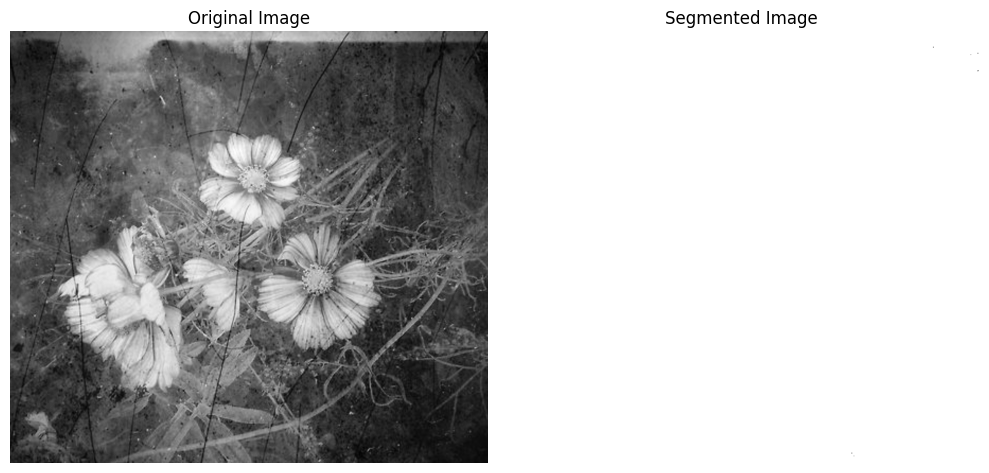

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image in grayscale
img = cv2.imread("original_image.png", 0)

# Get image dimensions
rows, cols = img.shape

# Create an empty image for the segmented result
segmented_img = np.zeros_like(img, dtype='uint8')

# Set the desired intensity range for segmentation
min_range = 8 # interchangeable
max_range = 150 # same response to previous comment

# Vectorized approach for segmentation (faster)
segmented_img[img >= min_range] = 255 # Set pixelswithin range to white (255)
segmented_img[img < min_range] = img[img < min_range] # Copy other pixel values

# Save original and segmented images (optional)
cv2.imwrite("original_image.png", img)
cv2.imwrite("segmentedimage.png", segmented_img)

# Display original and segmented images using Matplotlib
plt.figure(figsize=(10,5))

# ORIGINAL
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# SEGMENTED
plt.subplot(122)
plt.imshow(segmented_img, cmap='gray')
plt.title("Segmented Image")
plt.axis("off")

plt.tight_layout()
plt.show()

## THRESHOLDING

*   Simplest method of **segmenting images**

*   Used in various application such as **object detection, image segmentation and character recognition, enabling efficient analysis and interpretation of digital images**

Has a lot of techniques

*   Global Thresholding - widely used technique where a single threshold, value is applied to the entire image.

*   Simple Thresholding - basic technique that assigns binary value to each pixel based on a global threshold value. It is effective when the image has consistent lighting conditions and clear foreground-background separation.

*   Otsu's Method - Variance is the degree of sensitivity of a model's predictions to changes in the training data. High variance means that the model is too complex and overfits the training data. Lower variance indicates that the model is too simple and underfits the training data.

In short, the higher the variance = the better and overfits the data; the lower the variance = mediocre



Otsu's method
  - For Automatic Threshold Determination
  - It calculates the threshold by maximizing the between-class variance of pixel value, which effectively seperates foreground and background regions

Created by Nobuyuki Otsu

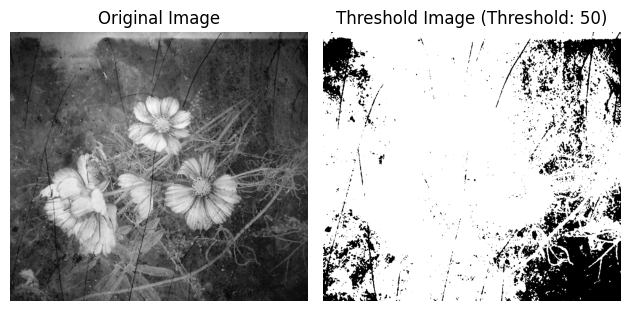

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale using OpenCV
img = cv2.imread('original_image.png', cv2.IMREAD_GRAYSCALE)

# Set the threshold value
threshold = 50

# Apply thresholding with OpenCV
ret, thresh_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

# Create a figure with the two subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the original image in the fist subplot
ax1.imshow(img, cmap='gray') # Use grayscale colormap
ax1.set_title('Original Image')
ax1.axis('off')

# Display the othreshold image in the secondsubplot
ax2.imshow(thresh_img, cmap='gray') # Use grayscale colormap
ax2.set_title('Threshold Image (Threshold: {})'.format(threshold))
ax2.axis('off')

# Adjust the space between plots and show the images
plt.tight_layout()
plt.show()

## GUASSIAN METHOD

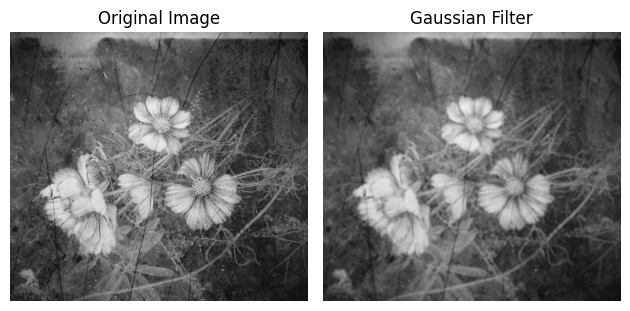

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (replace 'image_path.jpg' with your image file)
img = cv2.imread('original_image.png')

# Apply Gaussian blur with a specified kernel size (e.g., 5x5)
blurred_img = cv2.GaussianBlur(img, (7, 7), 10)

# Create a figure with the two subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the original image in the fist subplot
ax1.imshow(img, cmap='gray') # Use grayscale colormap
ax1.set_title('Original Image')
ax1.axis('off')

# Display the gaussian image in the secondsubplot
ax2.imshow(blurred_img, cmap='gray') # Use grayscale colormap
ax2.set_title('Gaussian Filter')
ax2.axis('off')

# Adjust the space between plots and show the images
plt.tight_layout()
plt.show()

GLOBAL THRESHOLDING  VALUE IN PYTHON USING OTSU'S METHOD

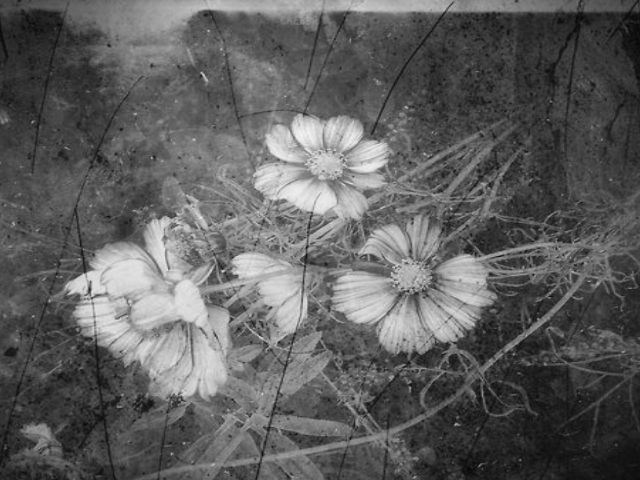

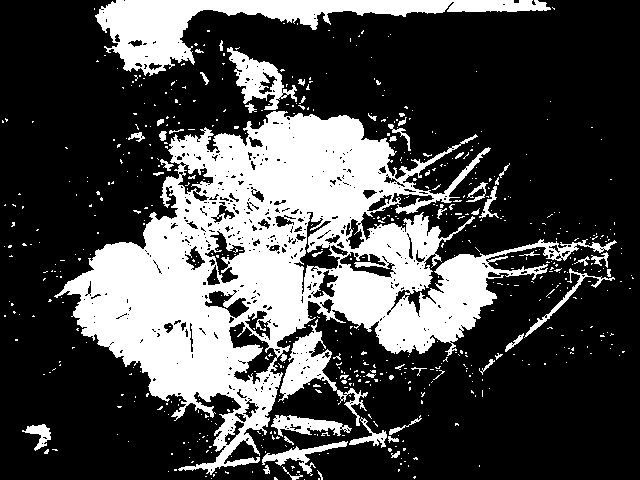

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('original_image.png', cv2.IMREAD_GRAYSCALE)

# resize image to the desired width and height
desired_width = 640
desired_height = 480

resized_image = cv2.resize(image, (desired_width, desired_height))

# Calculate GLoabl threshold value directly using Otsu's Method
_, global_thresholded = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calculate Otsu's threshold value
otsu_threshold_value = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]

# Display the results
cv2_imshow(resized_image)
cv2_imshow(global_thresholded)
print('Global Threshold Value: ', otsu_threshold_value)

cv2.waitKey(0)
cv2.destroyALLWindows()

## LINEAR STRETCHING


*   Also known as normalization or **contrast stretching**.
*   Technique that improves contrast of an image by redistributing the intesnity values across the entire intensity range.

Maps the minimum pixel value in the input image to 0 and the maximum pixel value to the highest value 255.



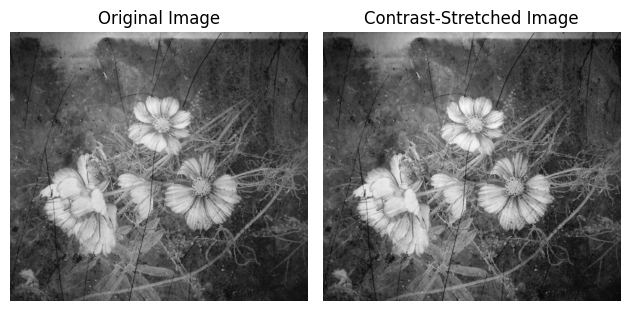

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image in grayscale using OpenCV
img = cv2.imread('original_image.png')

# Calculate minimum and maximum pixel values
minimum = np.min(img)
maximum = np.max(img)

# Apply Contrast Stretching
contrast_img = (img - minimum) / (maximum - minimum) * 255
contrast_img = np.uint8(contrast_img)

# Create a figure with the two subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the original image in the fist subplot
ax1.imshow(img) # Use grayscale colormap
ax1.set_title('Original Image')
ax1.axis('off')

# Display the othreshold image in the secondsubplot
ax2.imshow(contrast_img) # Use grayscale colormap
ax2.set_title('Contrast-Stretched Image')
ax2.axis('off')

# Adjust the space between plots and show the images
plt.tight_layout()
plt.show()

## HISTOGRAM EQUALIZATION


*   More advance contrast enhancement technique that redistributes the pixel values in an image so that the output image has a uniform histogram.
*   This method is useful for images with poor contrast due to uneven lighting or sensor limitation.


## Histogram Specification (Also known as Histogram Matching)
  - A technique that transform the pixel values  in an image so that its histogram matches a desired target histogram.



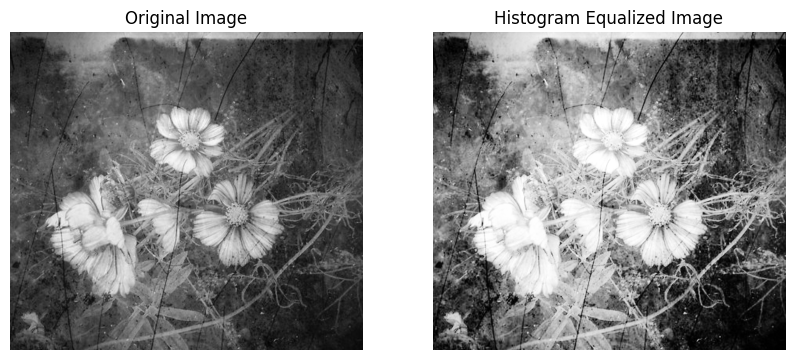

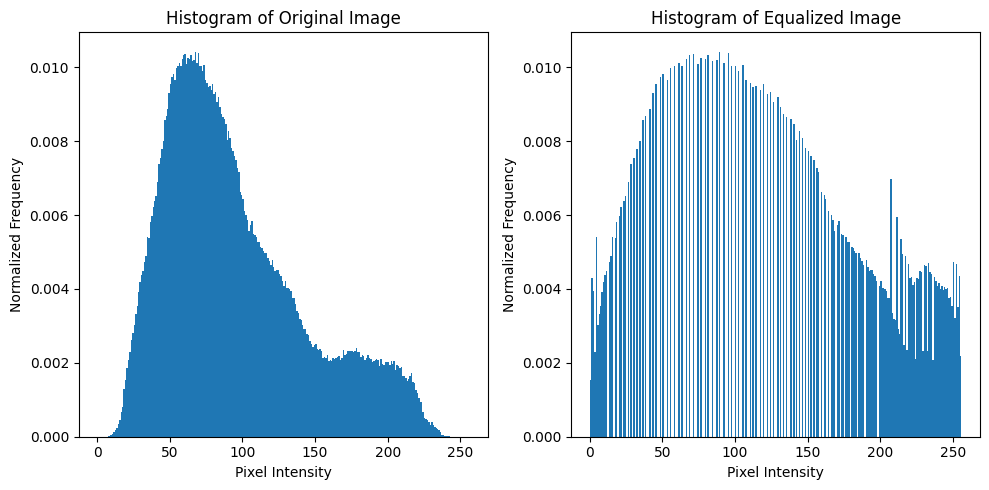

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale using OpenCV
img_gray = cv2.imread('original_image.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization using OpenCV
equ_img = cv2.equalizeHist(img_gray)

# Create a figure with the two subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(10, 5))

# Display the original image in the fist subplot
ax1.imshow(img_gray, cmap='gray') # Use grayscale colormap
ax1.set_title('Original Image')
ax1.axis('off')

# Display the othreshold image in the second subplot
ax2.imshow(equ_img, cmap='gray') # Use grayscale colormap
ax2.set_title('Histogram Equalized Image')
ax2.axis('off')

# Create a figure with the two subplots for side-by-side comparison
fig, (ax3, ax4) = plt.subplots(1, 2 , figsize=(10, 5))

# Plot the histogram of the original image
ax3.hist(img_gray.ravel(), bins=256, range=(0,256), density=True)
ax3.set_title('Histogram of Original Image')
ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Normalized Frequency')

# Plot the histogram of the equalized image
ax4.hist(equ_img.ravel(), bins=256, range=(0,256), density=True)
ax4.set_title('Histogram of Equalized Image')
ax4.set_xlabel('Pixel Intensity')
ax4.set_ylabel('Normalized Frequency')

# Adjust the space between plots and show the images
plt.tight_layout()
plt.show()

## DISPLAY OF ALL IMAGES

In [ ]:
# Display the original image in the fist subplot
ax1.imshow(img) # Use grayscale colormap
ax1.set_title('Original Image')
ax1.axis('off')

(-0.5, 915.5, 827.5, -0.5)